In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [6]:
from google.colab import files
uploaded = files.upload()

Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data (1).xlsx


In [7]:
fname = list(uploaded.keys())[0]
if fname.lower().endswith(('.xls', '.xlsx')):
    df = pd.read_excel(fname)
else:
    df = pd.read_csv(fname)



In [8]:

print(df.head())
print(df.info())
print(df.describe())

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73.97237  United S

In [19]:
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
if 'price' in df.columns:
    df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
if 'reviews per month' in df.columns:
    df['reviews per month'] = pd.to_numeric(df['reviews per month'], errors='coerce')

In [20]:
if 'neighbourhood group' in df.columns and 'price' in df.columns:
    avg_price_nbhd = df.groupby('neighbourhood group')['price'].mean().reset_index()
if 'cancellation_policy' in df.columns:
    cancel_counts = df['cancellation_policy'].value_counts().reset_index()
    cancel_counts.columns = ['cancellation_policy', 'count']
scatter_df = df.copy()
scatter_df = scatter_df.dropna(subset=['availability 365', 'reviews per month'])



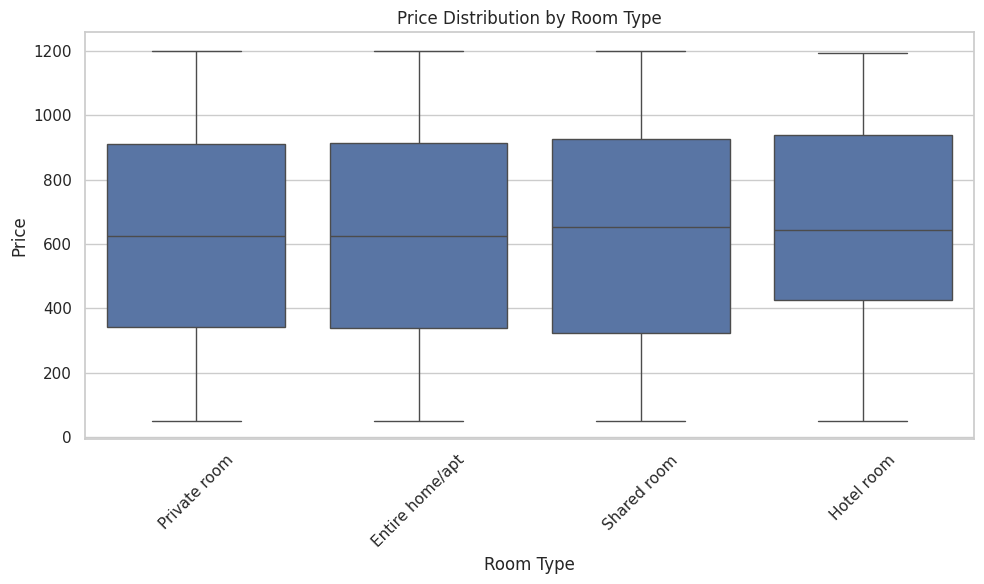

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room type', y='price')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


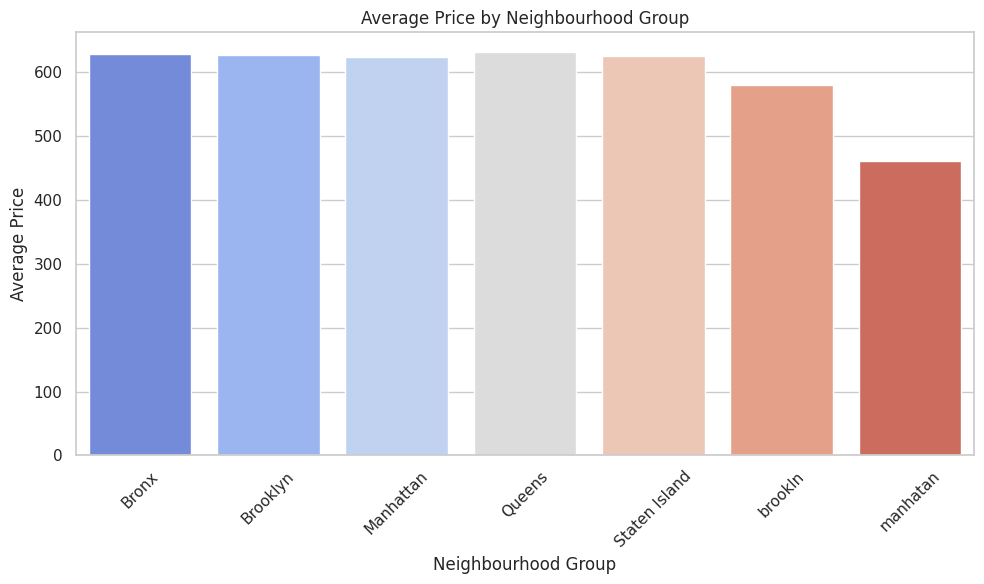

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_nbhd, x='neighbourhood group', y='price', hue='neighbourhood group', palette='coolwarm', legend=False)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

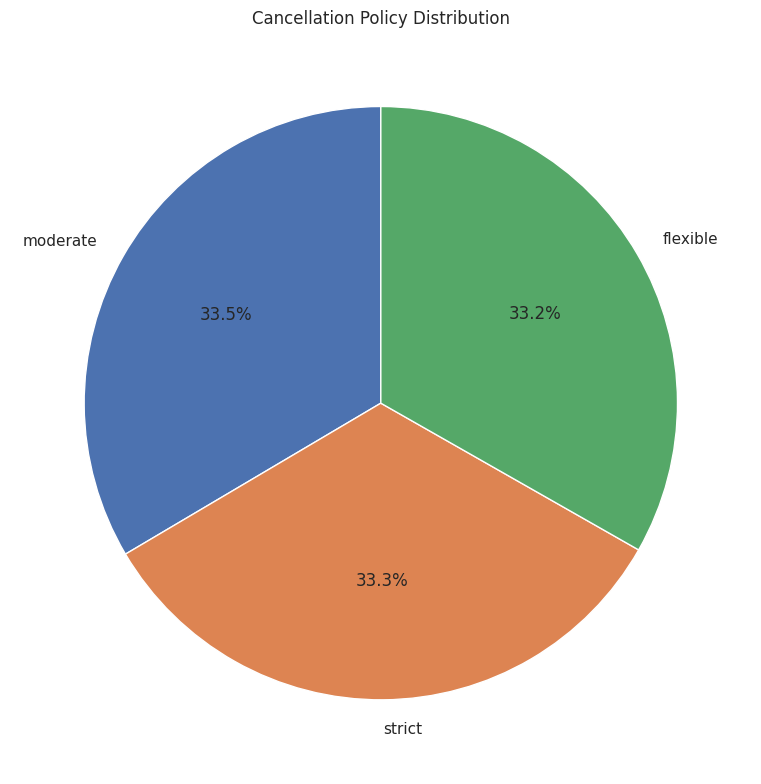

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(cancel_counts['count'],
        labels=cancel_counts['cancellation_policy'],
        autopct='%1.1f%%', startangle=90)
plt.title('Cancellation Policy Distribution')
plt.tight_layout()
plt.show()

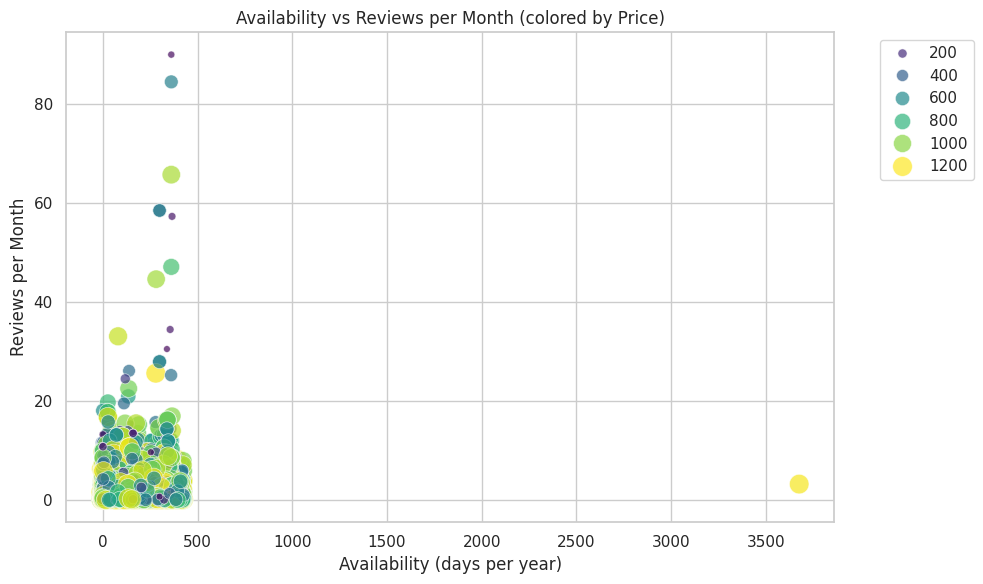

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_df,
                x='availability 365',
                y='reviews per month',
                hue='price',
                palette='viridis',
                size='price',
                sizes=(20, 200),
                alpha=0.7)
plt.title('Availability vs Reviews per Month (colored by Price)')
plt.xlabel('Availability (days per year)')
plt.ylabel('Reviews per Month')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()